## Credit Card Fraud 

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.
*0 the transaction is not fraudulent, 1 the transaction is fraudulent*

In [1]:
#Import libraries for analysis of the the dataset 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import kagglehub 
import os

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load Data
file_path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

#Files downloaded
files = os.listdir(file_path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['card_transdata.csv']


In [3]:
# Select the first CSV file (assuming it exists)
csv_file = [f for f in files if f.endswith(".csv")][0]  # Get the first CSV file

# Load card_transdata dataset and assign to a variable
cardtrans = pd.read_csv(os.path.join(file_path, csv_file))

# Print the first few rows
print("First 5 rows of the dataset:")
cardtrans.head()

First 5 rows of the dataset:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
#get data discriptive statistics 
cardtrans.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Get data demensions 
cardtrans.shape

(1000000, 8)

In [6]:
#Check for null values 
cardtrans.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
#Check datatypes 
cardtrans.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
#Get the distribution of values for 0 and 1 
fraud_counts = cardtrans['fraud'].value_counts()
fraud_counts

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

### Data Visualizations 

$\color{red}{\text{Histograms}}$ 

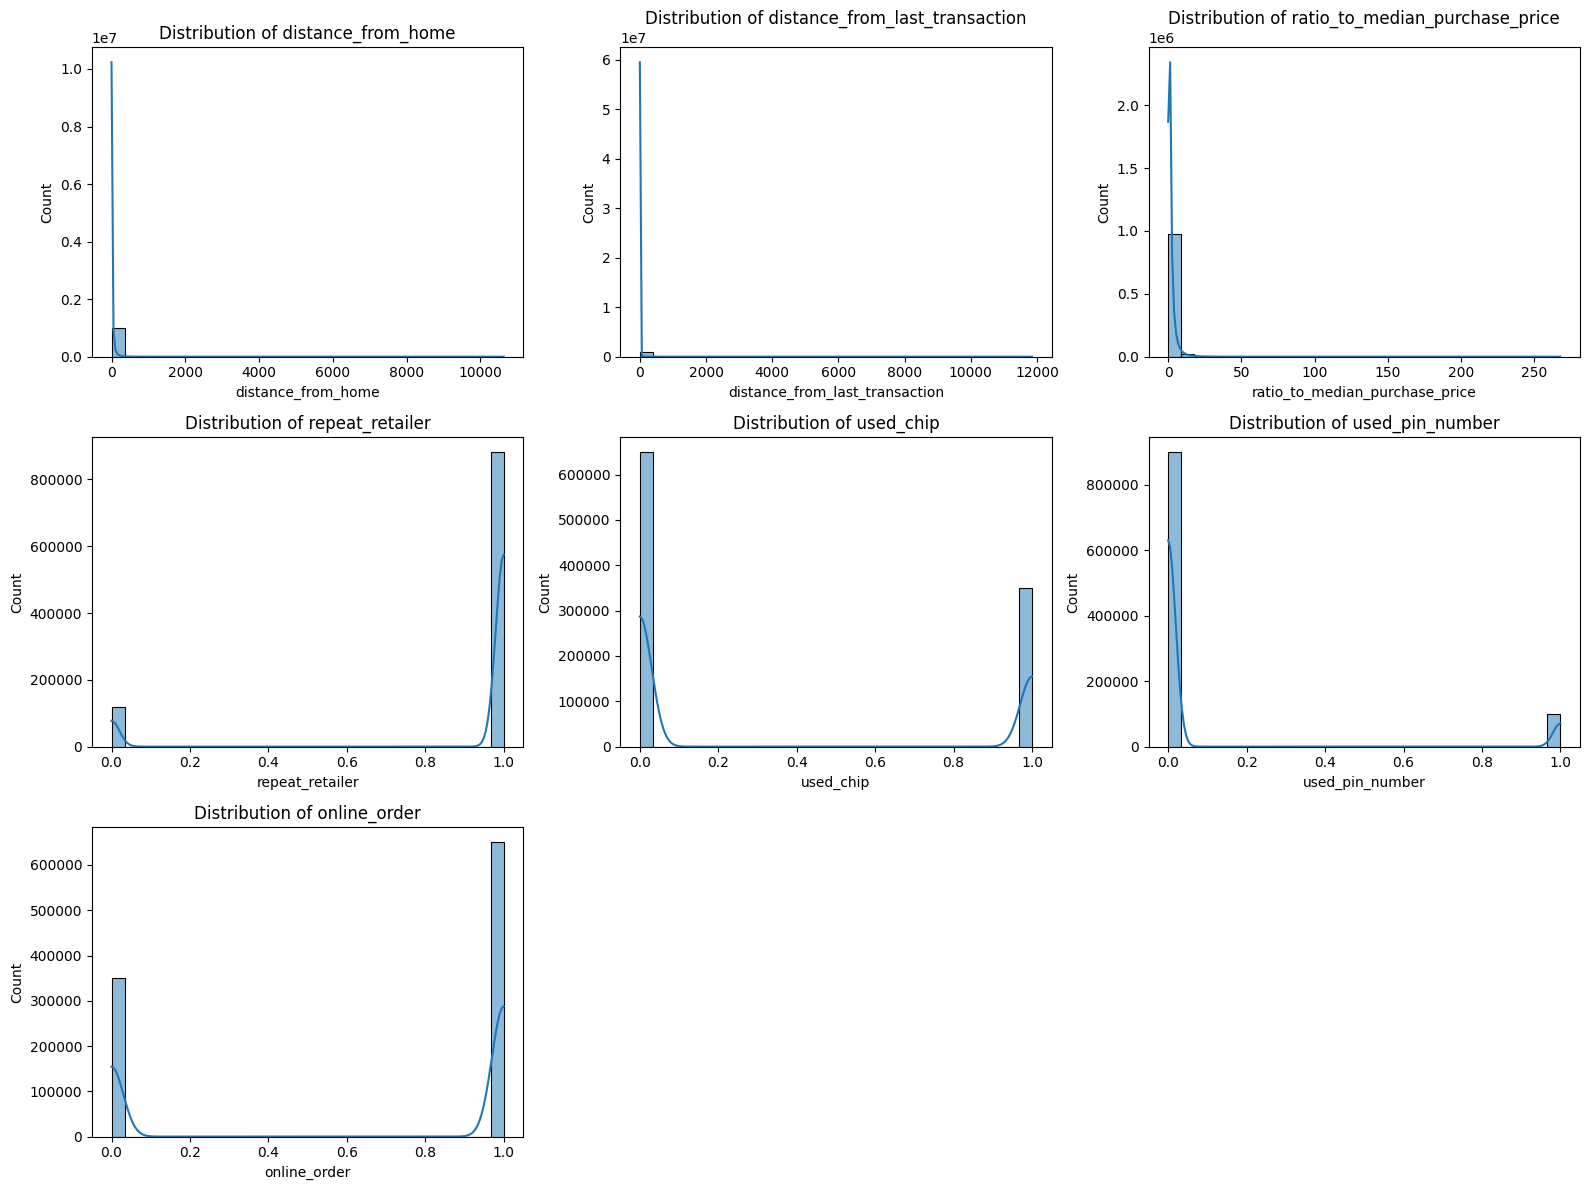

In [9]:
# Histograms for all numerical features 
plt.figure(figsize=(16,12))
for i, col in enumerate(cardtrans.drop(columns="fraud").columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cardtrans[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

$\color{red}{\text{Boxplots}}$

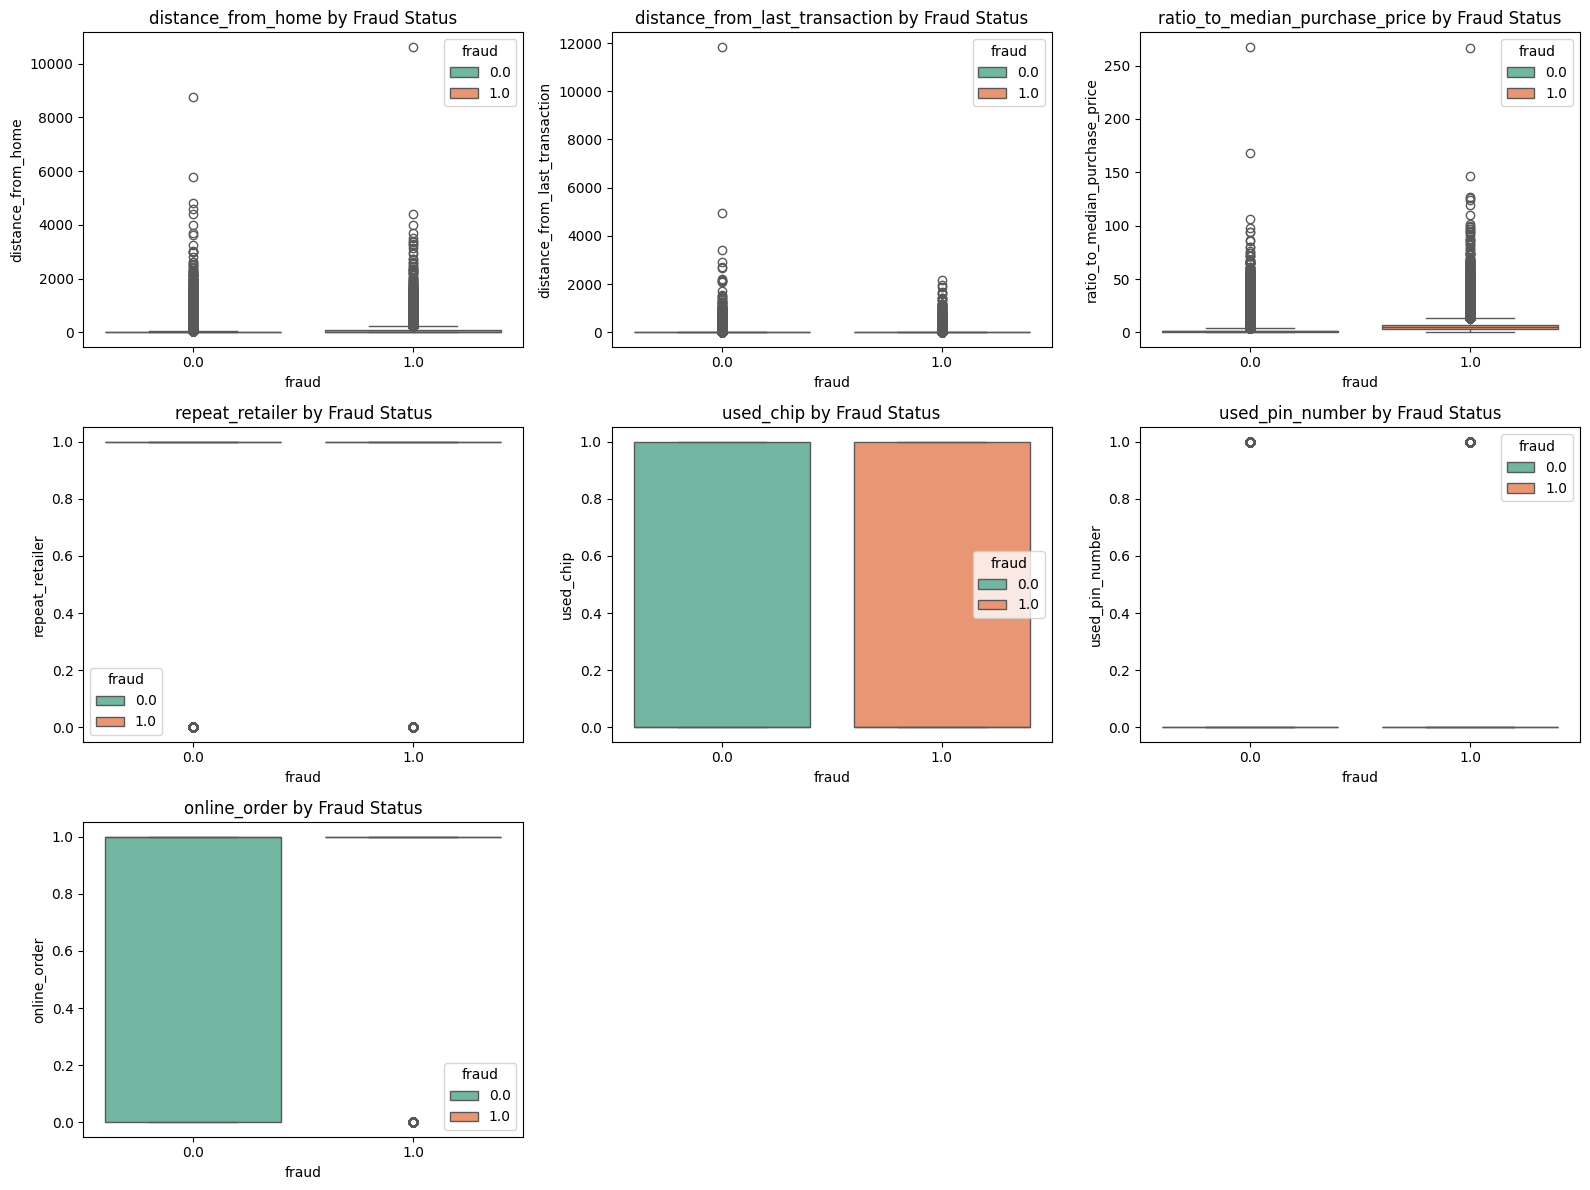

In [10]:
#Boxplot of all features 
plt.figure(figsize=(16, 12))
for i, col in enumerate(cardtrans.drop(columns='fraud').columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=cardtrans, palette="Set2", hue = 'fraud')
    plt.title(f"{col} by Fraud Status")
plt.tight_layout()
plt.show()

Show boxplots of continuous variables

Continuous variables are distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price

boolean variables are: repeat_retailer, nused_chip, used_pin_number, online_order, and fraud

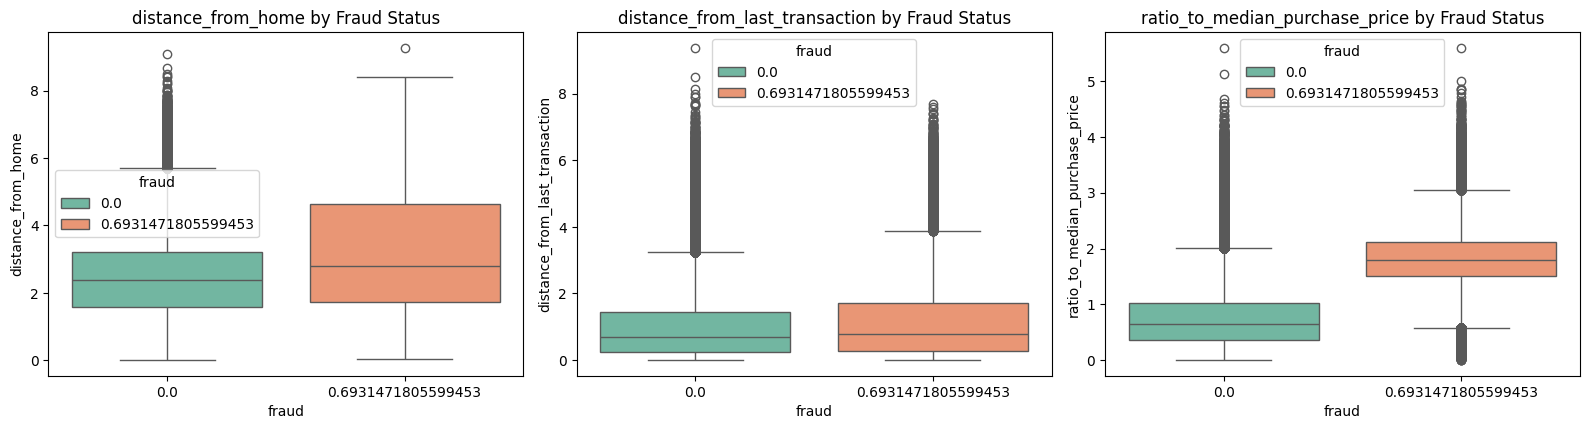

In [11]:
#Boxplot of continuous variables with log+1 transfomation to reduce positve skewness and improve data symmetry 

#list continuous variables 
Cont_cols = cardtrans[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'fraud']]

Cont_cols = np.log(Cont_cols+1)
plt.figure(figsize=(16, 12))
for i, col in enumerate(Cont_cols.drop(columns= ('fraud')).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=Cont_cols, palette="Set2", hue = 'fraud')
    plt.title(f"{col} by Fraud Status")
plt.tight_layout()
plt.show()

$\color{red}{\text{Correlation Matrix}}$

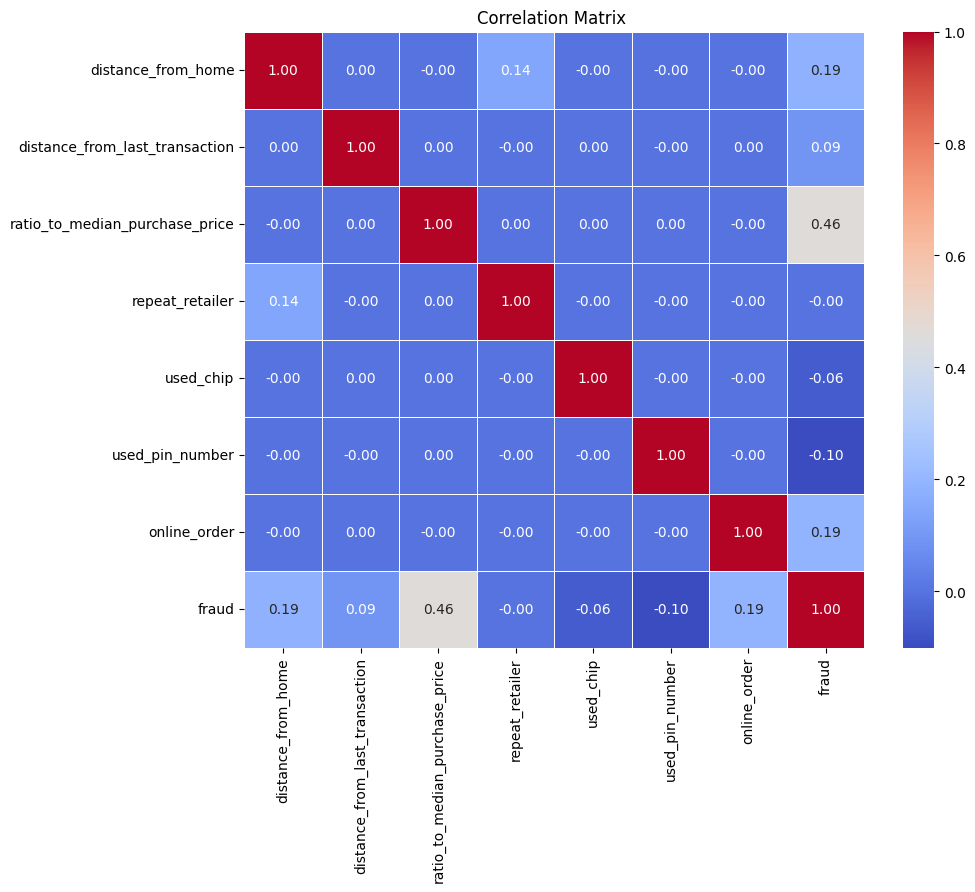

In [12]:
# Compute correlation matrix
corr_matrix = cardtrans.corr()

#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix ")
plt.show()

Create a triangle heatmap 

*Cytation for reference page*

Geeks for Geeks. (2024). How to create a Triangle Correlation Heatmap in seaborn – Python?. *Geeks for Geeks*. https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/

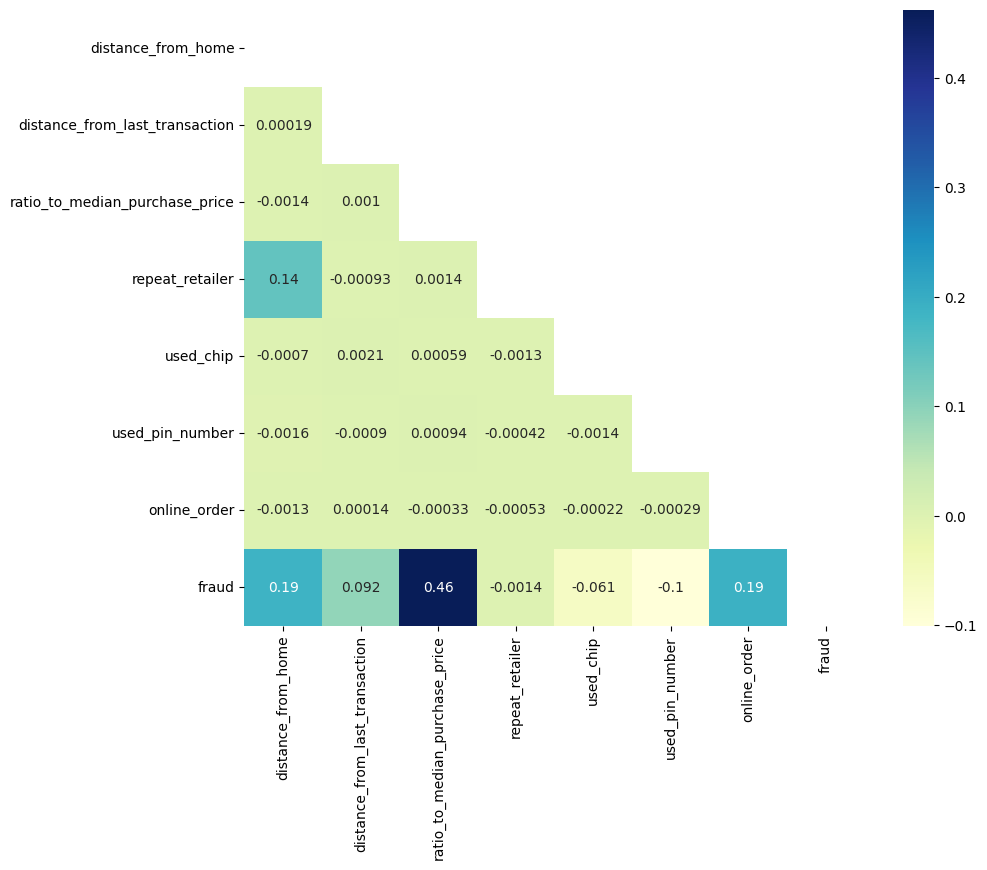

In [13]:
#plot triangle heatmap

# creating mask 
mask = np.triu(np.ones_like(cardtrans.corr())) 
  
# plotting a triangle correlation heatmap 
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(cardtrans.corr(), cmap="YlGnBu", annot=True, mask=mask) 

$\color{red}{\text{Count Plot}}$

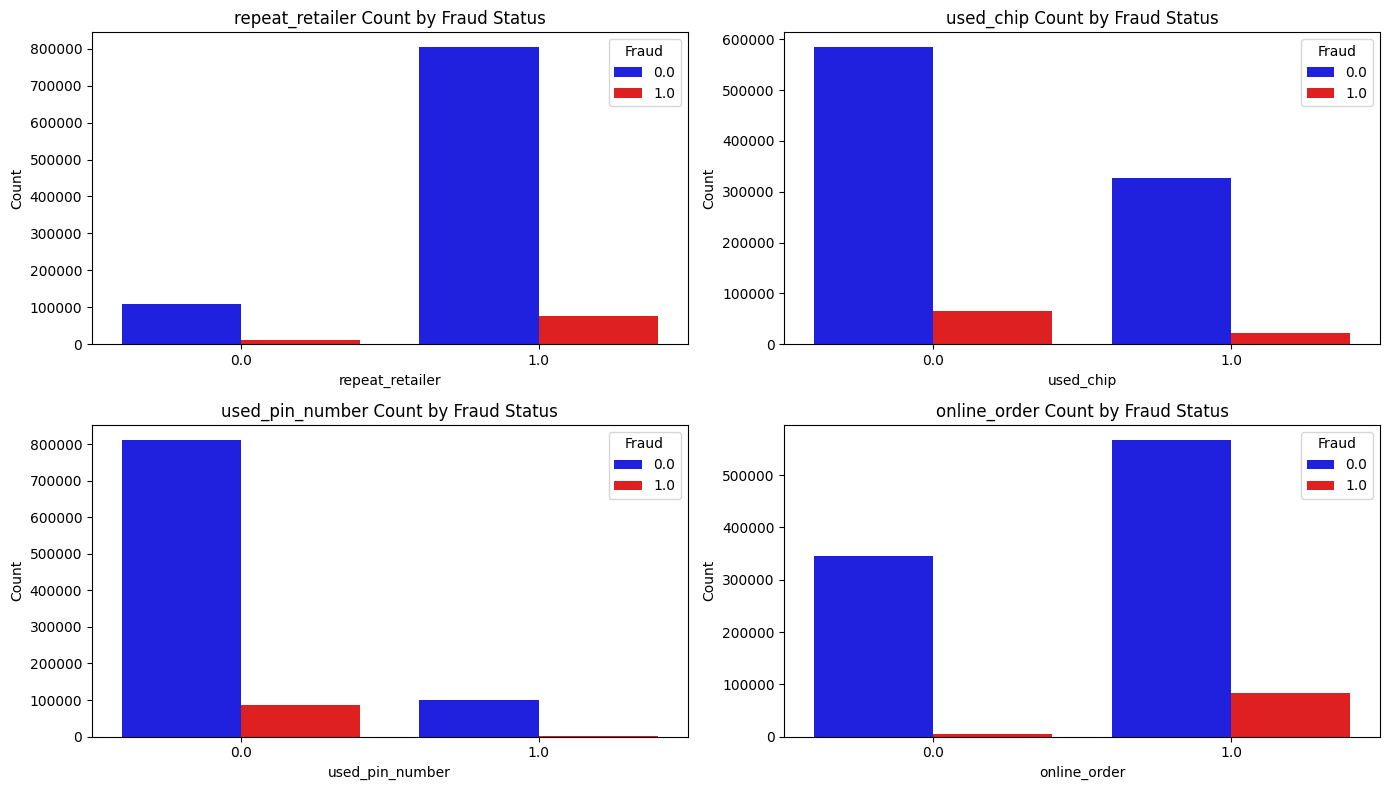

In [14]:
binary_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Define a custom color palette

custom_palette = {0: "blue", 1: "red"}  # 0 = Not Fraud, 1 = Fraud
#Used ChatGPT to customise palette color https://chatgpt.com/share/67fae6cc-910
plt.figure(figsize=(14, 8))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='fraud', data=cardtrans, palette=custom_palette)
    plt.title(f"{col} Count by Fraud Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Fraud")
plt.tight_layout()
plt.show()

In [15]:
print("\nEDA Summary:")
print("- Dataset has no missing values.")
print(f"- Fraud cases distribution: {fraud_counts.to_dict()}")
print("- Correlation highest between fraud and Ratio to Median Purchase Price.")


EDA Summary:
- Dataset has no missing values.
- Fraud cases distribution: {0.0: 912597, 1.0: 87403}
- Correlation highest between fraud and Ratio to Median Purchase Price.


$\color{red}{\text{Pairplot}}$

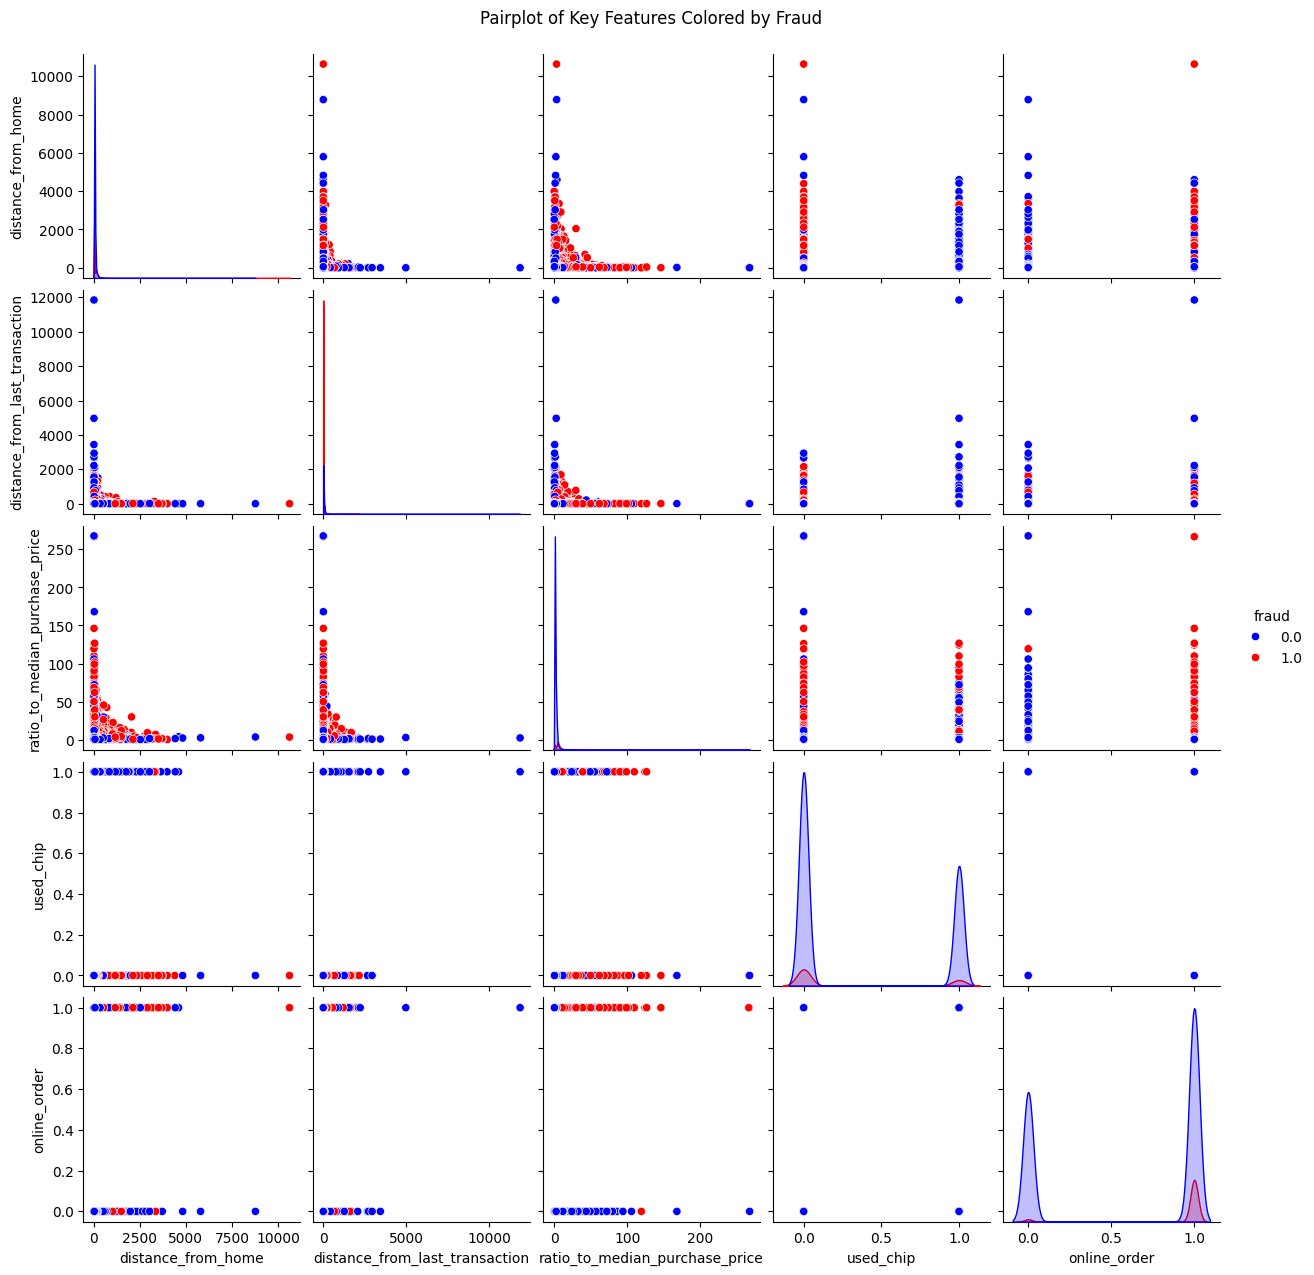

In [16]:
# Reduce pairplot to most informative features (avoid overloading)
important_features = ['distance_from_home', 'distance_from_last_transaction',
                      'ratio_to_median_purchase_price', 'used_chip', 'online_order', 'fraud']

sns.pairplot(cardtrans[important_features], hue='fraud', palette={0: 'blue', 1: 'red'}, diag_kind='kde')
plt.suptitle("Pairplot of Key Features Colored by Fraud", y=1.02)
plt.show()

### Partition the dataset into training and testing datasets for modeling 

This dataset contains 1,000,000 total cases. Since this dataset is relatively large, a partitioning between 75-90% may be acceptable. (Larose & Larose, 2019)

In [17]:
#import data partitioning libaries 
from sklearn.model_selection import train_test_split
import random

In [18]:
#partition the dataset into training and testing datasets
#test_size 80% partitioning from the original data into the testing data
#random_sate sets random number generator speed 
cardtrans_train, cardtrans_test = train_test_split(cardtrans, test_size = 0.20, random_state = 7)

In [19]:
#confirm partitining
print("The shape of the original datset is", cardtrans.shape,
      "\nThe shape of the partitioned trainign set is", cardtrans_train.shape,
      "\nThe shape of the partitioned testing datset is", cardtrans_test.shape)

The shape of the original datset is (1000000, 8) 
The shape of the partitioned trainign set is (800000, 8) 
The shape of the partitioned testing datset is (200000, 8)


The training datset is 80% of the orginal datset and the testing dataset is 20% of the orginal dataset. 

*Check the training data set for the partition*

    Numerical variables: Two sample t-test for the difference in means 

    Categorical variable with two classes: Z-test for the difference in proportions

    Categorical variables with more than two classes: test for the homogeneity of proportions 


In [20]:
#import needed libaries 
from scipy import stats #for t-test
import statsmodels.stats.proportion as smp #for test for homogeneity of proportions 

distance_from_home, distance_from_last_transaction, and ratio_to_meadian_purchase_price	are numerical variables. Check partitioning using t-test 

In [21]:
# Perform the two-sample t-test distance_from_home 
# (OpenAI, 2025a)[for reference page Gemini 3/27/2025 https://www.google.com/search?client=firefox-b-1-d&q=two+sample+t+test+in+python]
t_statistic, p_value = stats.ttest_ind(cardtrans_test['distance_from_home'], cardtrans_train['distance_from_home'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")


T-statistic: 1.6093572694997533
P-value: 0.10753855876007543
Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.


In [22]:
# Perform the two-sample t-test distance_from_last_transaction (OpenAI, 2025)
t_statistic, p_value = stats.ttest_ind(cardtrans_test['distance_from_last_transaction'], cardtrans_train['distance_from_last_transaction'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: -0.3491976786489459
P-value: 0.7269409823449284
Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.


In [23]:
# Perform the two-sample t-test ratio_to_median_purchase_price (OpenAI, 2025)
t_statistic, p_value = stats.ttest_ind(cardtrans_test['ratio_to_median_purchase_price'], cardtrans_train['ratio_to_median_purchase_price'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: -0.15814964827070438
P-value: 0.8743389111122247
Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.


The three numeric variables: distance_from_home, distance_from_last_transaction, and ratio_to_meadian_purchase_price

failed to reject the null hypothesis. Therefore, p-values are less than the significance level and are statistically significant. 

Partitioning was successful. 

Check partitioning by testing for homogenity of proportions.

repeat_retailer, used_chip, used_pin_number, online_order, and fraud are categorical variables with more than two classes. 

*Outside the scope of the class, will come back later to figure out how to test homogenity proportions of uneven test and training datasets, ie: count 200,000 and 800,000*

### Balance the dataset for modeling 

In [24]:
#Find percentage of data distribution to check relative frequencys 
posper = fraud_counts[1]/(fraud_counts[1]+fraud_counts[0])
pospercent = round(posper*100, 2)
print("The percentage of positive fradulent creditcard use cases is", pospercent, "%")

The percentage of positive fradulent creditcard use cases is 8.74 %


This dataset contains only 8.74 percent of positive cases. Balancing the training data may provide better modeling outcomes. 

Increase the fraudulent records from 8.74% to 25%

In [25]:
#find the number of fraudulent records in the training set 
#Get the distribution of values for 0 and 1 
fraud_counts_train = cardtrans_train['fraud'].value_counts()
fraud_counts_train

fraud
0.0    730077
1.0     69923
Name: count, dtype: int64

In [26]:
#Find percentage of data distribution to check relative frequencys 
pospercent_train = fraud_counts_train[1]/(fraud_counts_train[1]+fraud_counts_train[0])
pospercent_train = round(pospercent_train*100, 2)
print("The percentage of positive fradulent creditcard use cases is", pospercent_train, "%")

The percentage of positive fradulent creditcard use cases is 8.74 %


Same percentage of fradulent cases as the original dataset 

In [27]:
#Caculate records to resample 
# rare + x = p(records + x)
resample_records = (0.25*(fraud_counts_train[1]+fraud_counts_train[0]) - fraud_counts_train[1]) / (1-0.25)
print("The number of records to resample to 25 percent fradulent creditcard use cases is", resample_records)

The number of records to resample to 25 percent fradulent creditcard use cases is 173436.0


Test data should not be balanced 

In [28]:
#Resampling the training dataset

#  isolate records to resample
to_resample = cardtrans_train.loc[cardtrans_train['fraud'] == 1.0]

#sample from records of intrest 
our_resample = to_resample.sample(n = 173436, replace = True)

In [29]:
#add resampled records into original training dataset 
cardtrans_train_rebal = pd.concat([cardtrans_train, our_resample])

In [30]:
#Check desired percentage of fradulent records 
rebal_counts = cardtrans_train_rebal['fraud'].value_counts()

#Find percentage of data distribution to check relative frequencys 
pospercent_rebal = rebal_counts[1]/(rebal_counts[1]+rebal_counts[0])
pospercent_rebal = round(pospercent_rebal*100, 2)
print("The percentage of positive fradulent creditcard use cases is", pospercent_rebal, "%")

The percentage of positive fradulent creditcard use cases is 25.0 %


Dataset balancing was sucessful 

### Modeling 

The Dataminning task is to create a Classification model to classify cases of fradulent credit card use. This is a supervised learning method.

$\color{red}{\text{Decision Tree}}$

Decision tree will be an approprate base model for the features of this dataset. Since data features show non-linear relationships. 

Build a CART Decision Tree Using Python on training data


In [31]:
#Packages needed for CART Decision Tree 
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [32]:
#Save fraud as the independent variable 
y = cardtrans_train_rebal[['fraud']]

In [33]:
#Save distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer, used_chip,used_pin_number, and online_order
#as dependent variables 
X = cardtrans_train_rebal[['distance_from_home','distance_from_last_transaction',
                           'ratio_to_median_purchase_price','repeat_retailer', 
                           'used_chip','used_pin_number', 'online_order']]

In [34]:
#Specify feature names 
X_names = ['distance_from_home','distance_from_last_transaction',
           'ratio_to_median_purchase_price','repeat_retailer', 
           'used_chip','used_pin_number', 'online_order']

y_names = [0,1]

In [35]:
#Run CART algorithm 
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X,y)

[Text(0.5555555555555556, 0.875, 'ratio_to_median_purchase_price <= 4.0\ngini = 0.375\nsamples = 973436\nvalue = [730077, 243359]\nclass = 0.0'),
 Text(0.3333333333333333, 0.625, 'distance_from_home <= 100.004\ngini = 0.15\nsamples = 761947\nvalue = [699494, 62453]\nclass = 0.0'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'distance_from_last_transaction <= 50.001\ngini = 0.041\nsamples = 691969\nvalue = [677627, 14342]\nclass = 0.0'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 671578\nvalue = [671578, 0]\nclass = 0.0'),
 Text(0.3333333333333333, 0.125, 'gini = 0.417\nsamples = 20391\nvalue = [6049, 14342]\nclass = 1.0'),
 Text(0.4444444444444444, 0.375, 'gini = 0.43\nsamples = 69978\nvalue = [21867, 48111]\nclass = 1.0'),
 Text(0.7777777777777778, 0.625, 'online_order <= 0.5\ngini = 0.247\nsamples = 211489\nvalue = [30583, 180906]\nclass = 1.0'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.438\nsa

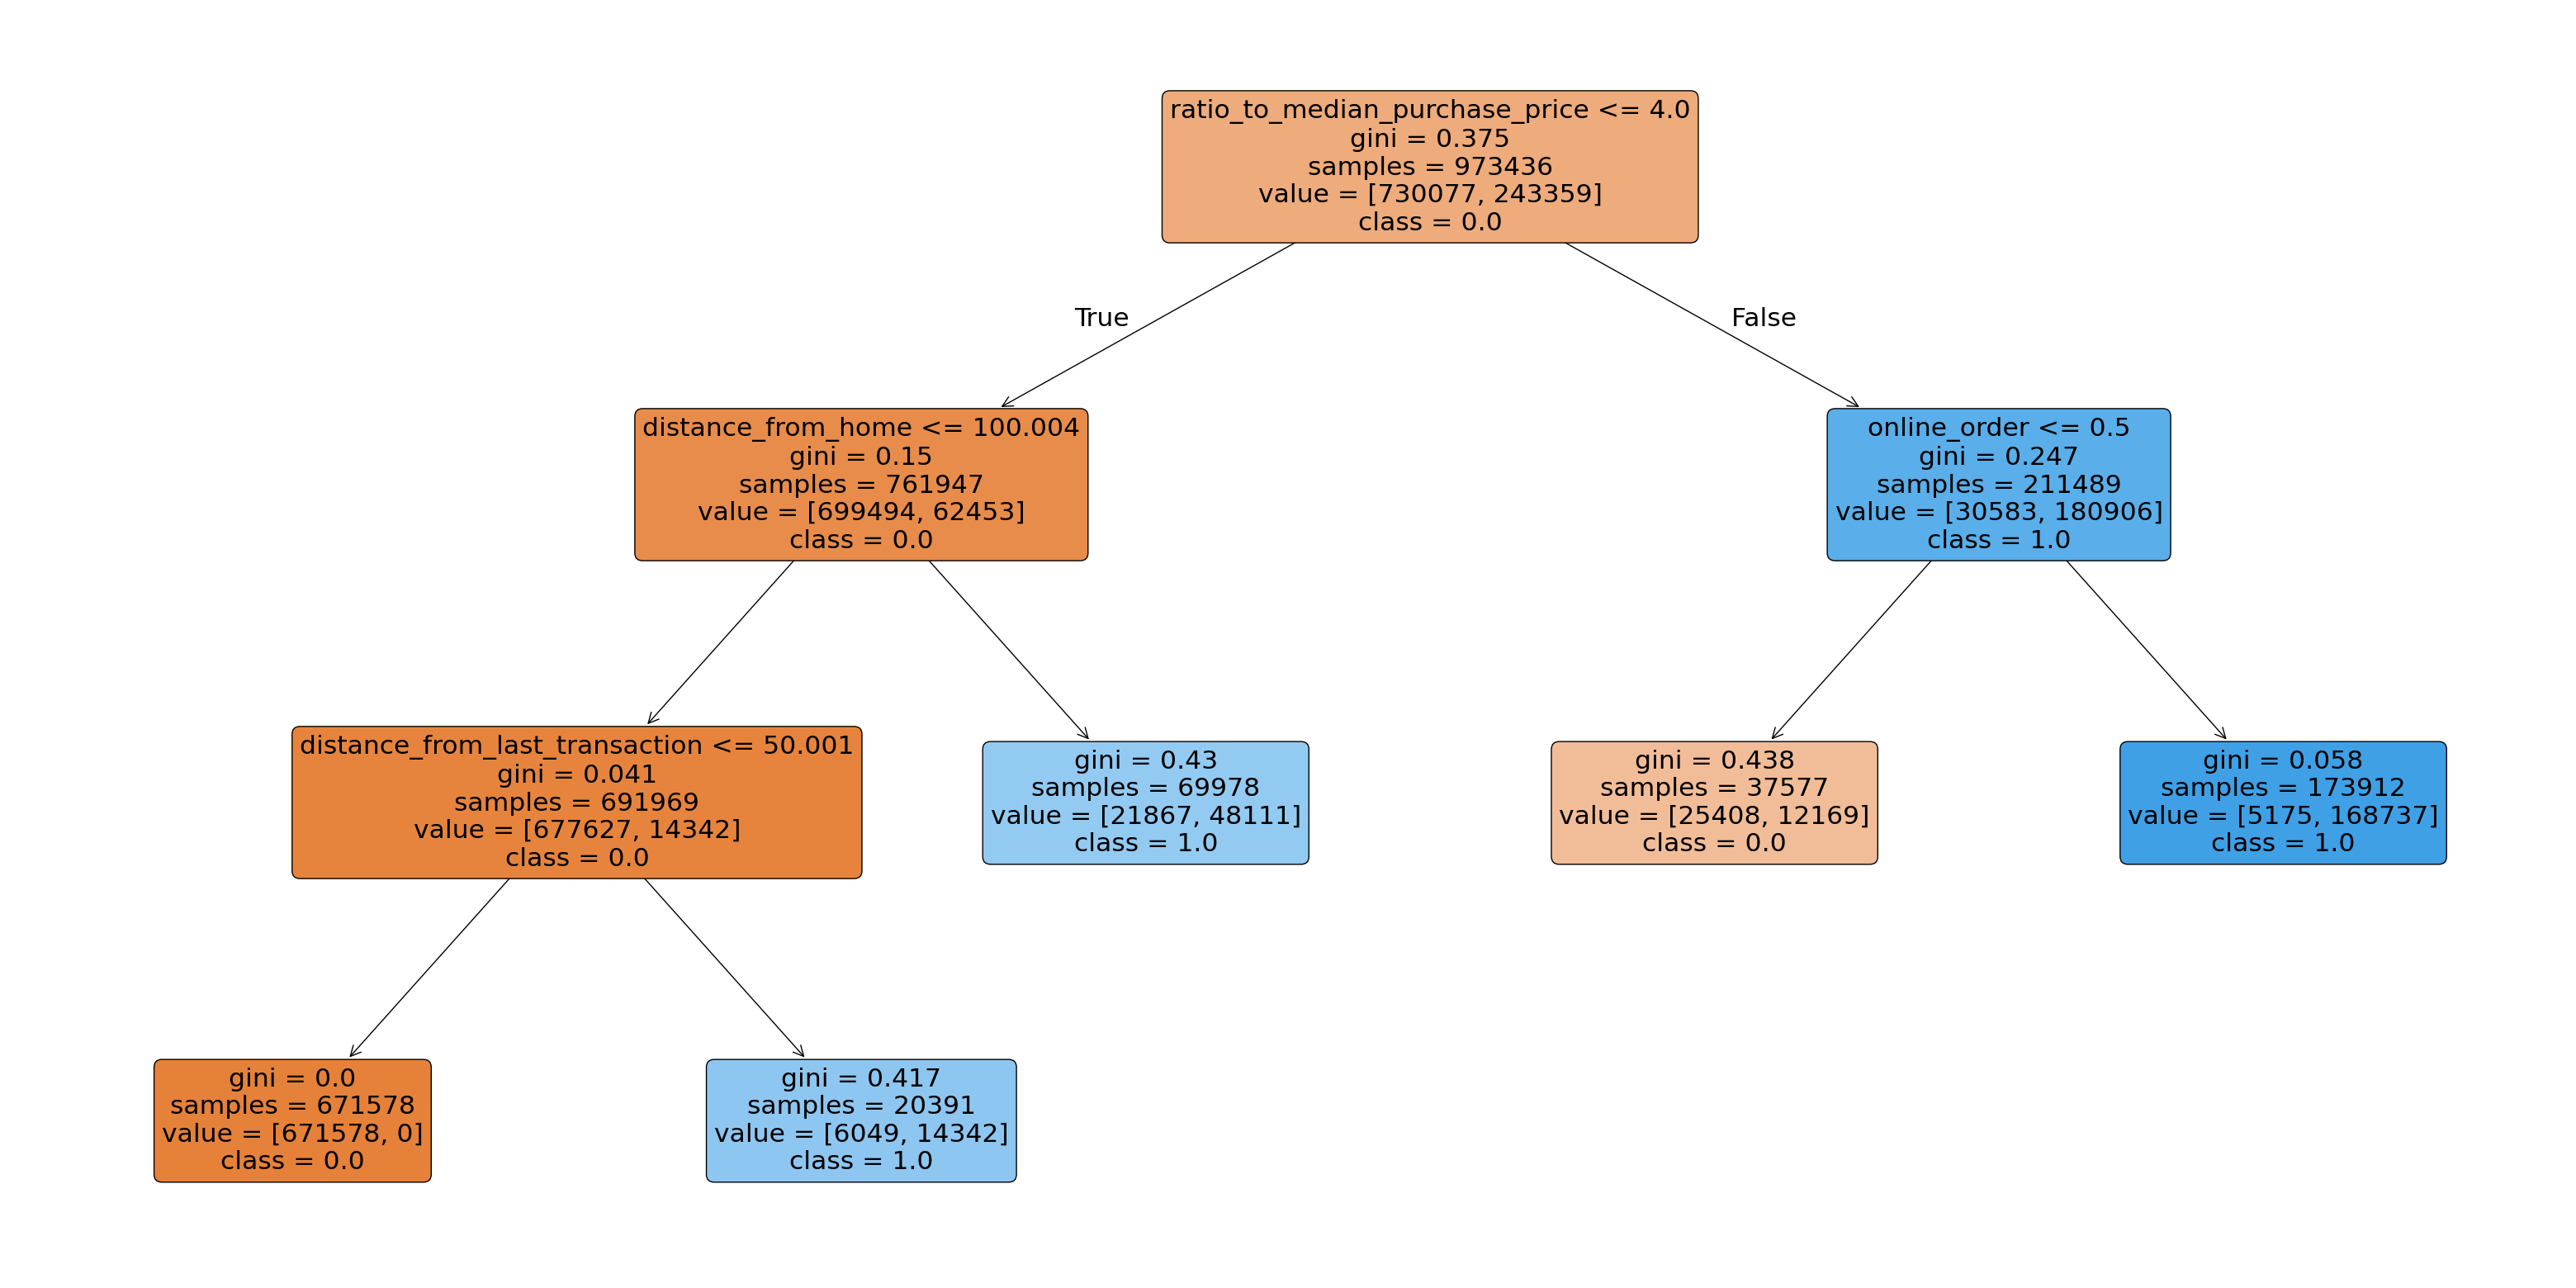

In [36]:
#Plot Decission Tree on training data
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(cart01, feature_names = X.columns, class_names=y['fraud'].astype(str).unique(), filled=True, rounded = True)

Build a CART Decision Tree Using Python on testing data for comparison 

In [37]:
#Save fraud as the independent variable 
y_test = cardtrans_test[['fraud']]

#Save distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer, used_chip,used_pin_number, and online_order
#as dependent variables 
X_test = cardtrans_test[['distance_from_home','distance_from_last_transaction',
                           'ratio_to_median_purchase_price','repeat_retailer', 
                           'used_chip','used_pin_number', 'online_order']]

In [38]:
#Run CART algorithm 
cart02 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X_test,y_test)

[Text(0.4444444444444444, 0.875, 'ratio_to_median_purchase_price <= 4.0\ngini = 0.16\nsamples = 200000\nvalue = [182520, 17480]\nclass = 0.0'),
 Text(0.2222222222222222, 0.625, 'distance_from_home <= 100.017\ngini = 0.049\nsamples = 179398\nvalue = [174896, 4502]\nclass = 0.0'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.012\nsamples = 170470\nvalue = [169477, 993]\nclass = 0.0'),
 Text(0.3333333333333333, 0.375, 'gini = 0.477\nsamples = 8928\nvalue = [5419, 3509]\nclass = 0.0'),
 Text(0.6666666666666666, 0.625, 'online_order <= 0.5\ngini = 0.466\nsamples = 20602\nvalue = [7624, 12978]\nclass = 1.0'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.224\nsamples = 7234\nvalue = [6306, 928]\nclass = 0.0'),
 Text(0.7777777777777778, 0.375, 'used_pin_number <= 0.5\ngini = 0.178\nsamples = 13368\nvalue = [1318, 12050]\nclass = 1.0'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 11990\nvalue = [0, 11

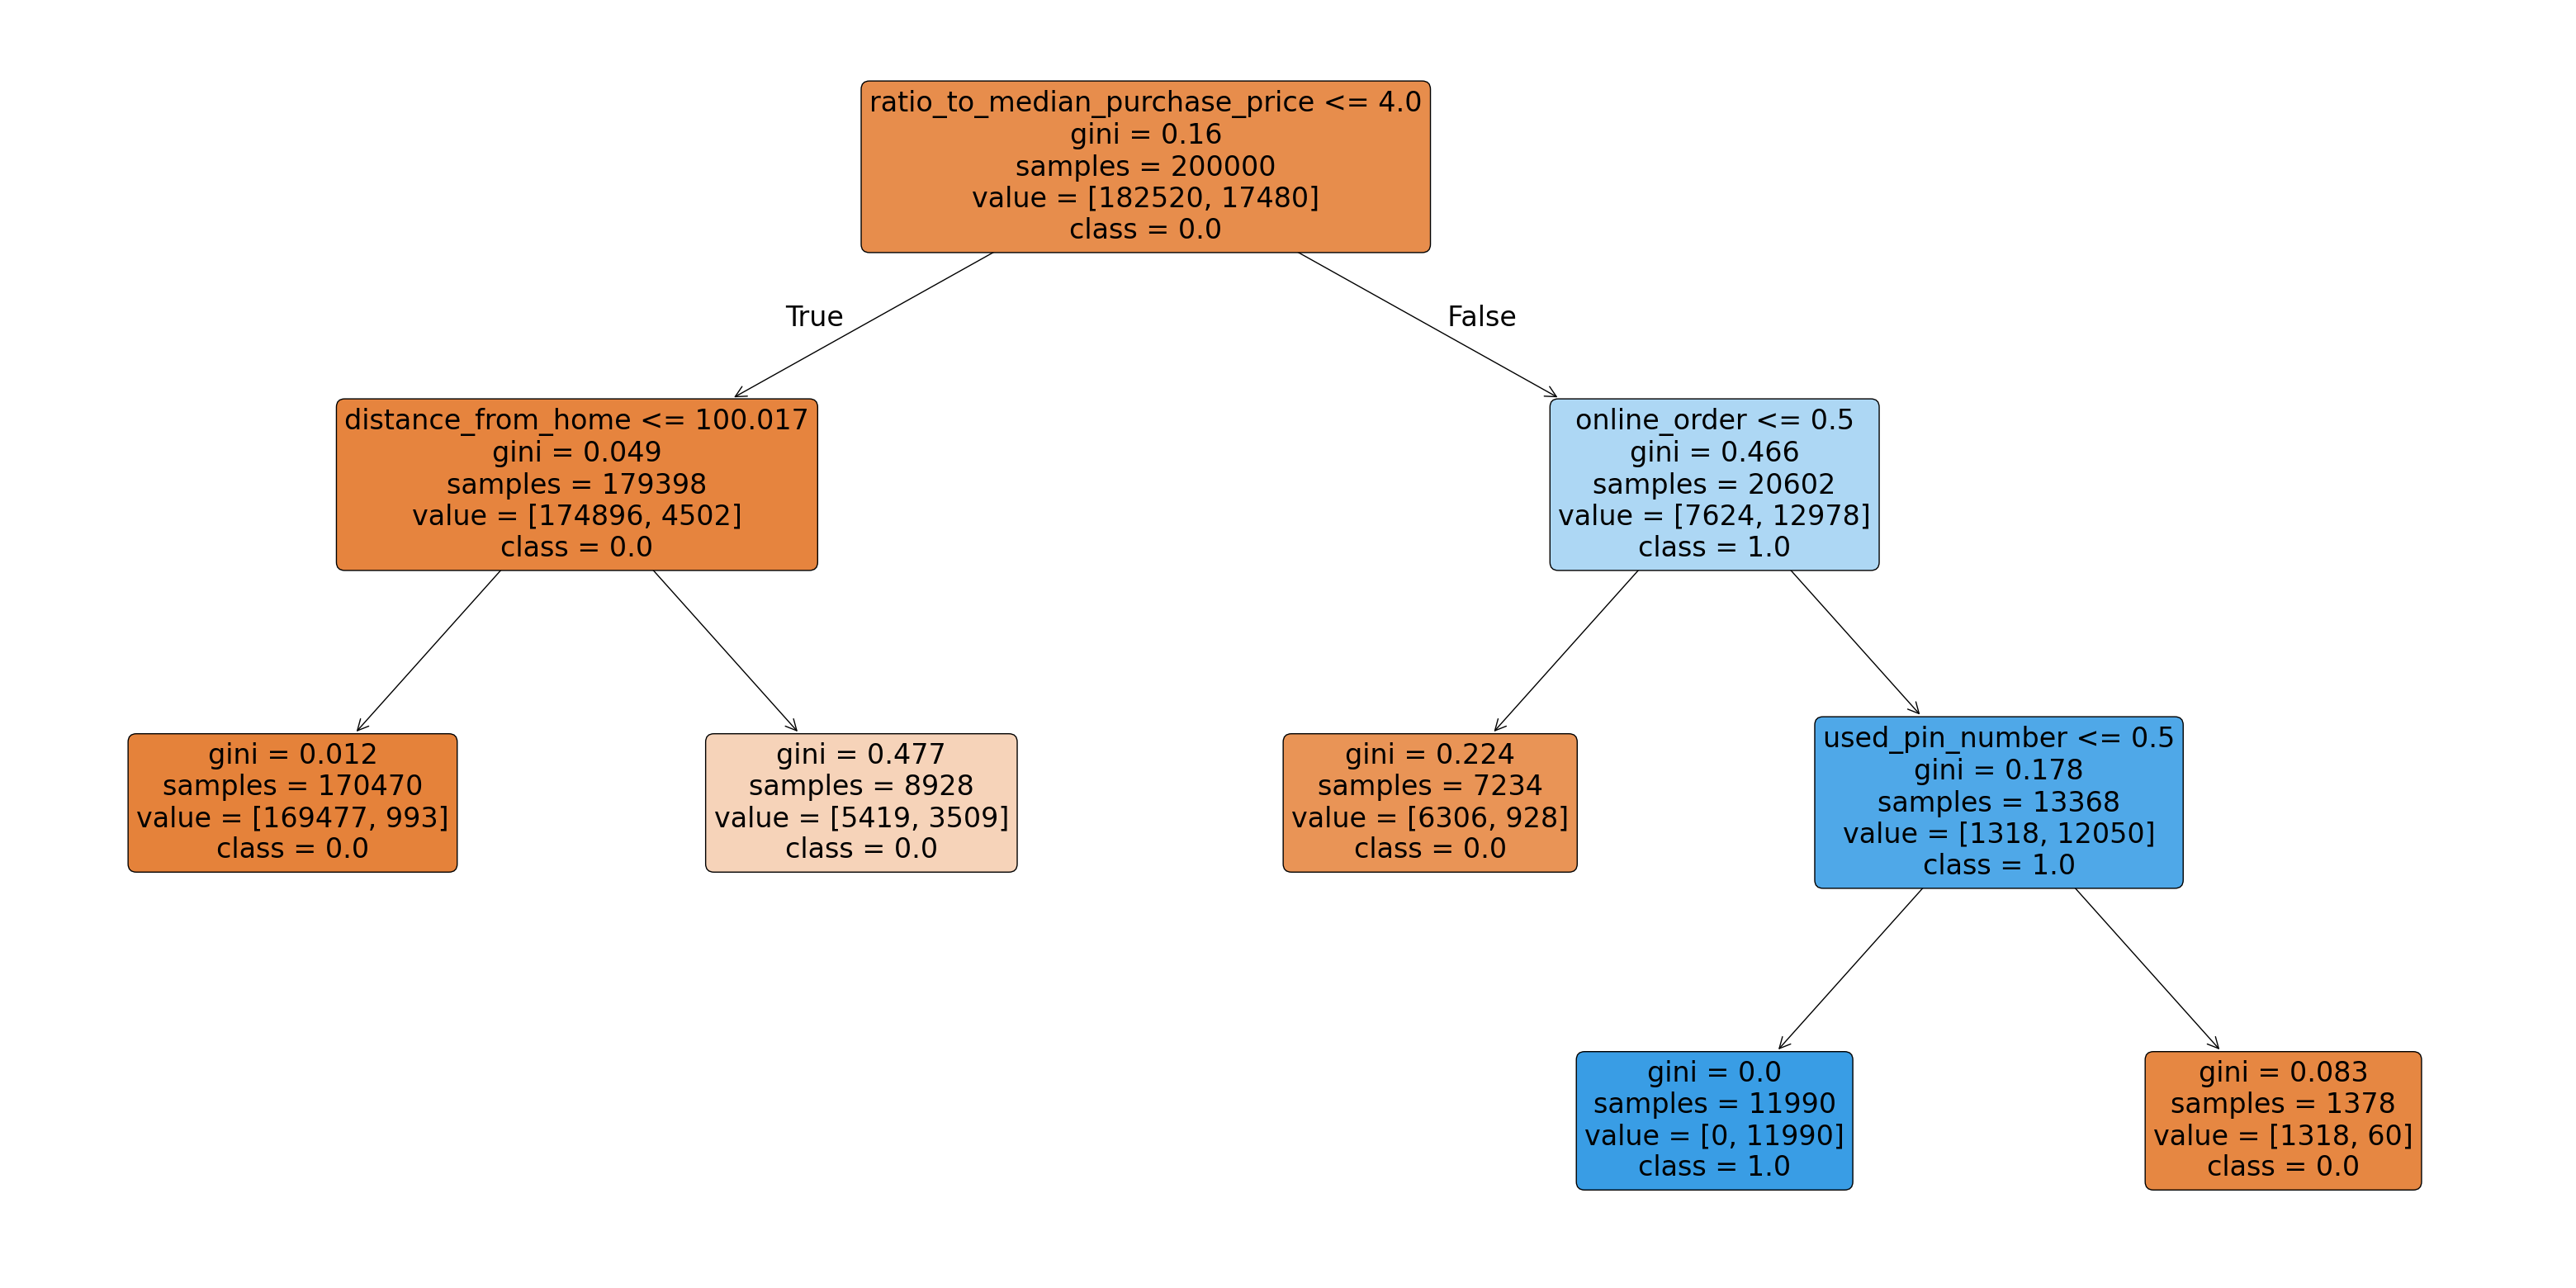

In [39]:
#Plot Decission Tree on testing data 
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(cart02, feature_names = X.columns, class_names=y['fraud'].astype(str).unique(), filled=True, rounded = True)

$\color{red}{\text{Random Forest}}$

## Build a Random Forest Using Python on training data 

In [40]:
#Load libraries for Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Formate variables as one-dimensional numpy arrays 
rfy = np.ravel(y)

In [42]:
#Create a Random Forest 
rf01 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X,rfy)

## Build a Random Forest Using Python on testing data for comparison 

In [43]:
#Formate variables as one-dimensional numpy arrays 
rfy_test = np.ravel(y_test)

In [44]:
#Create a Random Forest 
rf02 = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X_test,rfy_test)

$\color{red}{\text{Naive Bayes}}$

## Naive Bayes Model Using Python on training data 

In [45]:
#import required libraries for Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

In [46]:
#Run Naive Bayes algorithm 
nb = MultinomialNB().fit(X, rfy)

## Naive Bayes Model Using Python on test data 

In [47]:
#Run Naive Bayes algorithm 
nb_test = MultinomialNB().fit(X_test, rfy_test)

$\color{red}{\text{Neural Networks}}$

In [48]:
#Load Libraries for Neural Network modeling
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [49]:
#Separate training and response variables 
X_Neu = pd.DataFrame(cardtrans_train_rebal[['distance_from_home','distance_from_last_transaction',
                           'ratio_to_median_purchase_price','repeat_retailer', 
                           'used_chip','used_pin_number', 'online_order']])
y_Neu = pd.DataFrame(cardtrans_train_rebal[['fraud']])

In [50]:
#View independent variable 
X_Neu.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
648911,7.719143,0.153094,2.207072,1.0,0.0,0.0,1.0
402969,4.096257,8.600147,1.554251,1.0,0.0,0.0,1.0
327515,1.100761,22.548549,0.040264,0.0,0.0,0.0,1.0
913774,28.187642,3.840116,1.040529,1.0,0.0,1.0,1.0
875277,6.081452,1.908698,9.460431,1.0,0.0,0.0,1.0


Normalize data to a range of 0-1 using Min/Max Scaler 

$$
\text{Normalization} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In [51]:
#Create definition for Min/Max Scaler equarion 
def normal (x):
    normalized = (X_Neu[x] - X_Neu[x].min()) / (X_Neu[x].max() - X_Neu[x].min())
    return normalized

home_nor = normal('distance_from_home')
trans_nor = normal('distance_from_last_transaction')
pri_nor = normal('ratio_to_median_purchase_price')

In [52]:
#Display normalized data 
print(home_nor.head(), '\n',trans_nor.head(), '\n',pri_nor.head())

648911    0.000877
402969    0.000464
327515    0.000123
913774    0.003209
875277    0.000690
Name: distance_from_home, dtype: float64 
 648911    0.000013
402969    0.000726
327515    0.001903
913774    0.000324
875277    0.000161
Name: distance_from_last_transaction, dtype: float64 
 648911    0.008220
402969    0.005782
327515    0.000129
913774    0.003864
875277    0.035305
Name: ratio_to_median_purchase_price, dtype: float64


Convert cariables into 1-dimensional numpy array 

In [53]:
#Find Variable types 

#independent varaibles 
print(type(home_nor))
print(type(trans_nor))
print(type(pri_nor))
print(type(X_Neu['repeat_retailer']))
print(type(X_Neu['used_chip']))
print(type(X_Neu['used_pin_number']))
print(type(X_Neu['online_order']))

#dependent variable 
print(type(y_Neu))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [54]:
#convert to 1-dimensional numpy array 
def convert_num (n):
    a = np.array(n).reshape(-1,1)
    return a 

dis_home = convert_num(home_nor)
dis_transaction	= convert_num(trans_nor)
ratio_price	= convert_num(pri_nor)
rep_retailer = convert_num(X_Neu['repeat_retailer'])
us_chip	= convert_num(X_Neu['used_chip'])
us_pin = convert_num(X_Neu['used_pin_number'])
on_order = convert_num(X_Neu['online_order'])

y_1d = convert_num(y_Neu)

In [55]:
#redefine input features and output variables
X_Neu = np.concatenate((dis_home, dis_transaction, ratio_price, rep_retailer, us_chip, us_pin, on_order), axis=1)
y_Neu = y_1d

In [56]:
# define the neural network architecture
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [57]:
#fit neural network model to dataset 
model.fit(X_Neu, y_Neu, epochs=30, batch_size=32)

Epoch 1/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 292us/step - accuracy: 0.7481 - loss: 0.4855
Epoch 2/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 286us/step - accuracy: 0.7633 - loss: 0.4402
Epoch 3/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 282us/step - accuracy: 0.8252 - loss: 0.3770
Epoch 4/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 279us/step - accuracy: 0.8866 - loss: 0.3016
Epoch 5/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 285us/step - accuracy: 0.9149 - loss: 0.2496
Epoch 6/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 283us/step - accuracy: 0.9250 - loss: 0.2229
Epoch 7/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 281us/step - accuracy: 0.9306 - loss: 0.2033
Epoch 8/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 8s 276us/step - accuracy: 0.9336 - loss: 0.1924
Epoch 9/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 283us/step - accuracy: 0.9355 - loss: 0.1856
Epoch 10/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 285us/step - accuracy: 0.9368 - loss: 0.1801
Epoch 11/30
30420/30420 ━━━━━━━━━━━━━━━━━━━━ 9s 279us/step - accuracy: 0.9381 -

## Neural Network Model Using Python on test data

In [58]:
#Separate training and response variables 
X_Neu_test = pd.DataFrame(cardtrans_test[['distance_from_home','distance_from_last_transaction',
                           'ratio_to_median_purchase_price','repeat_retailer', 
                           'used_chip','used_pin_number', 'online_order']])
y_Neu_test = pd.DataFrame(cardtrans_test[['fraud']])

In [59]:
#View independent variable 
X_Neu_test.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
330111,114.594794,0.956496,2.718907,1.0,0.0,0.0,0.0
663520,0.521859,0.304829,0.848831,0.0,0.0,0.0,0.0
525009,12.679726,0.697291,0.975954,1.0,0.0,0.0,0.0
199449,3.134994,0.749451,0.610983,1.0,1.0,0.0,0.0
978049,3.549230,0.116309,1.913200,1.0,0.0,0.0,1.0


In [60]:
#Create definition for Min/Max Scaler equarion 
def normal_test (x):
    normalized = (X_Neu_test[x] - X_Neu_test[x].min()) / (X_Neu_test[x].max() - X_Neu_test[x].min())
    return normalized

home_nor_test = normal_test('distance_from_home')
trans_nor_test = normal_test('distance_from_last_transaction')
pri_nor_test = normal_test('ratio_to_median_purchase_price')

In [61]:
#Display normalized data 
print(home_nor_test.head(), '\n',trans_nor_test.head(), '\n',pri_nor_test.head())

330111    0.010777
663520    0.000049
525009    0.001192
199449    0.000294
978049    0.000333
Name: distance_from_home, dtype: float64 
 330111    0.000325
663520    0.000104
525009    0.000237
199449    0.000255
978049    0.000039
Name: distance_from_last_transaction, dtype: float64 
 330111    0.028977
663520    0.009014
525009    0.010371
199449    0.006475
978049    0.020376
Name: ratio_to_median_purchase_price, dtype: float64


In [62]:
#Find Variable types 

#independent varaibles 
print(type(home_nor_test))
print(type(trans_nor_test))
print(type(pri_nor_test))
print(type(X_Neu_test['repeat_retailer']))
print(type(X_Neu_test['used_chip']))
print(type(X_Neu_test['used_pin_number']))
print(type(X_Neu_test['online_order']))

#dependent variable 
print(type(y_Neu_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [63]:
#convert to 1-dimensional numpy array 
dis_home_test = convert_num(home_nor_test)
dis_transaction_test	= convert_num(trans_nor_test)
ratio_price_test	= convert_num(pri_nor_test)
rep_retailer_test = convert_num(X_Neu_test['repeat_retailer'])
us_chip_test	= convert_num(X_Neu_test['used_chip'])
us_pin_test = convert_num(X_Neu_test['used_pin_number'])
on_order_test = convert_num(X_Neu_test['online_order'])

y_1d_test = convert_num(y_Neu_test)

In [64]:
#redefine input features and output variables
X_Neu_test = np.concatenate((dis_home_test, dis_transaction_test, ratio_price_test, rep_retailer_test, us_chip_test, us_pin_test, on_order_test), axis=1)
y_Neu_test = y_1d_test

In [65]:
#fit neural network model to dataset 
model.fit(X_Neu_test, y_Neu_test, epochs=30, batch_size=32)

Epoch 1/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 283us/step - accuracy: 0.9587 - loss: 0.1357
Epoch 2/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step - accuracy: 0.9635 - loss: 0.1211
Epoch 3/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 294us/step - accuracy: 0.9652 - loss: 0.1088
Epoch 4/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 277us/step - accuracy: 0.9658 - loss: 0.1081
Epoch 5/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 278us/step - accuracy: 0.9658 - loss: 0.1062
Epoch 6/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 285us/step - accuracy: 0.9671 - loss: 0.1018
Epoch 7/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step - accuracy: 0.9687 - loss: 0.1003
Epoch 8/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step - accuracy: 0.9701 - loss: 0.0981
Epoch 9/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 278us/step - accuracy: 0.9706 - loss: 0.0951
Epoch 10/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 280us/step - accuracy: 0.9708 - loss: 0.0953
Epoch 11/30
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 291us/step - accuracy: 0.9715 - loss: 0.0940
Epoch 12

# Model Predictions and Evaluations 

In [66]:
#Make model predictions for Decision Tree 
# trainng and test datasets 
pred_DT_Tr = cart01.predict(X)
pred_DT_Te = cart02.predict(X_test)

In [67]:
#Make model predictions for Random Forest 
# training and test dataset 
pred_RF_Tr = rf01.predict(X)
pred_RF_Te = rf02.predict(X_test)

In [68]:
#Make model predictions for Naive Bayes 
pred_NB_Tr = nb.predict(X)
pred_NB_Te = nb_test.predict(X_test)

In [69]:
#Make model predictions for Neural Networks 
pred_NN_Tr = (model.predict(X_Neu) > 0.5).astype(int)
pred_NN_Te = (model.predict(X_Neu_test) > 0.5).astype(int)

30420/30420 ━━━━━━━━━━━━━━━━━━━━ 5s 173us/step
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 172us/step


## Confusion Matrix/ Performance Metric 

In [70]:
#import confusion matrix library 
from sklearn.metrics import confusion_matrix

$\color{red}{\text{Decision Tree}}$

In [71]:
#Decision Tree Training Confusion Matrix 
cm_DT_Tr = confusion_matrix(y, pred_DT_Tr)
cm_DT_Tr

array([[696986,  33091],
       [ 12169, 231190]])

In [72]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_DT_Tr = cm_DT_Tr[0][0]
FP_DT_Tr = cm_DT_Tr[0][1]
FN_DT_Tr = cm_DT_Tr[1][0]
TP_DT_Tr = cm_DT_Tr[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_DT_Tr = sum(cm_DT_Tr)[0]
TPP_DT_Tr = sum(cm_DT_Tr)[1]
TAN_DT_Tr = TN_DT_Tr + FP_DT_Tr
TAP_DT_Tr = FN_DT_Tr + TP_DT_Tr

#Caculate matrix total  
GT_DT_TR = TN_DT_Tr + FP_DT_Tr + FN_DT_Tr + TP_DT_Tr

print('TN: ', TN_DT_Tr,
      '\nFP: ', FP_DT_Tr,
      '\nFN: ', FN_DT_Tr,
      '\nTP: ', TP_DT_Tr,
      '\nTPN: ', TPN_DT_Tr,
      '\nTPP: ', TPP_DT_Tr,
      '\nTAN: ', TAN_DT_Tr,
      '\nTAP: ', TAP_DT_Tr,
      '\nGT: ', GT_DT_TR)

TN:  696986 
FP:  33091 
FN:  12169 
TP:  231190 
TPN:  709155 
TPP:  264281 
TAN:  730077 
TAP:  243359 
GT:  973436


In [73]:
#Caculate performance metrics
Accuracy_DT_TR = (TN_DT_Tr + TP_DT_Tr)/ GT_DT_TR
Error_DT_TR = 1 - Accuracy_DT_TR
Sensitivity_DT_TR = TP_DT_Tr/TAP_DT_Tr
Specificity_DT_TR = TN_DT_Tr/TAN_DT_Tr
Precision_DT_TR = TP_DT_Tr/TPP_DT_Tr
F_DT_TR = (2*(Precision_DT_TR*Sensitivity_DT_TR))/(Precision_DT_TR+Sensitivity_DT_TR)

In [74]:
#Decision Tree Testing Confusion Matrix 
cm_DT_Te = confusion_matrix(y_test, pred_DT_Te)
cm_DT_Te

array([[182520,      0],
       [  5490,  11990]])

In [75]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_DT_Te = cm_DT_Te[0][0]
FP_DT_Te = cm_DT_Te[0][1]
FN_DT_Te = cm_DT_Te[1][0]
TP_DT_Te = cm_DT_Te[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_DT_Te = sum(cm_DT_Te)[0]
TPP_DT_Te = sum(cm_DT_Te)[1]
TAN_DT_Te = TN_DT_Te + FP_DT_Te
TAP_DT_Te = FN_DT_Te + TP_DT_Te

#Caculate matrix total  
GT_DT_Te = TN_DT_Te + FP_DT_Te + FN_DT_Te + TP_DT_Te

In [76]:
#Caculate performance metrics
Accuracy_DT_Te = (TN_DT_Te + TP_DT_Te)/ GT_DT_Te
Error_DT_Te = 1 - Accuracy_DT_Te
Sensitivity_DT_Te = TP_DT_Te/TAP_DT_Te
Specificity_DT_Te = TN_DT_Te/TAN_DT_Te
Precision_DT_Te = TP_DT_Te/TPP_DT_Te
F_DT_Te = (2*(Precision_DT_Te*Sensitivity_DT_Te))/(Precision_DT_Te+Sensitivity_DT_Te)

$\color{red}{\text{Random Forest}}$

In [77]:
#Random Forest Training Confusion Matrix 
cm_RF_Tr = confusion_matrix(y, pred_RF_Tr)
cm_RF_Tr

array([[730077,      0],
       [     0, 243359]])

In [78]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_RF_Tr = cm_RF_Tr[0][0]
FP_RF_Tr = cm_RF_Tr[0][1]
FN_RF_Tr = cm_RF_Tr[1][0]
TP_RF_Tr = cm_RF_Tr[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_RF_Tr = sum(cm_RF_Tr)[0]
TPP_RF_Tr = sum(cm_RF_Tr)[1]
TAN_RF_Tr = TN_RF_Tr + FP_RF_Tr
TAP_RF_Tr = FN_RF_Tr + TP_RF_Tr

#Caculate matrix total  
GT_RF_TR = TN_RF_Tr + FP_RF_Tr + FN_RF_Tr + TP_RF_Tr

In [79]:
#Caculate performance metrics
Accuracy_RF_TR = (TN_RF_Tr + TP_RF_Tr)/ GT_RF_TR
Error_RF_TR = 1 - Accuracy_RF_TR
Sensitivity_RF_TR = TP_RF_Tr/TAP_RF_Tr
Specificity_RF_TR = TN_RF_Tr/TAN_RF_Tr
Precision_RF_TR = TP_RF_Tr/TPP_RF_Tr
F_RF_TR = (2*(Precision_RF_TR*Sensitivity_RF_TR))/(Precision_RF_TR+Sensitivity_RF_TR)

In [80]:
#Random Forest Testing Confusion Matrix 
cm_RF_Te = confusion_matrix(y_test, pred_RF_Te)
cm_RF_Te

array([[182520,      0],
       [     0,  17480]])

In [81]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_RF_Te = cm_RF_Te[0][0]
FP_RF_Te = cm_RF_Te[0][1]
FN_RF_Te = cm_RF_Te[1][0]
TP_RF_Te = cm_RF_Te[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_RF_Te = sum(cm_RF_Te)[0]
TPP_RF_Te = sum(cm_RF_Te)[1]
TAN_RF_Te = TN_RF_Te + FP_RF_Te
TAP_RF_Te = FN_RF_Te + TP_RF_Te

#Caculate matrix total  
GT_RF_Te = TN_RF_Te + FP_RF_Te + FN_RF_Te + TP_RF_Te

In [82]:
#Caculate performance metrics
Accuracy_RF_Te = (TN_RF_Te + TP_RF_Te)/ GT_RF_Te
Error_RF_Te = 1 - Accuracy_RF_Te
Sensitivity_RF_Te = TP_RF_Te/TAP_RF_Te
Specificity_RF_Te = TN_RF_Te/TAN_RF_Te
Precision_RF_Te = TP_RF_Te/TPP_RF_Te
F_RF_Te = (2*(Precision_RF_Te*Sensitivity_RF_Te))/(Precision_RF_Te+Sensitivity_RF_Te)

$\color{red}{\text{Naive Bayes}}$

In [83]:
#Naive Bayes Training Confusion Matrix 
cm_NB_Tr = confusion_matrix(y, pred_NB_Tr)
cm_NB_Tr

array([[693216,  36861],
       [104751, 138608]])

In [84]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_NB_Tr = cm_NB_Tr[0][0]
FP_NB_Tr = cm_NB_Tr[0][1]
FN_NB_Tr = cm_NB_Tr[1][0]
TP_NB_Tr = cm_NB_Tr[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_NB_Tr = sum(cm_NB_Tr)[0]
TPP_NB_Tr = sum(cm_NB_Tr)[1]
TAN_NB_Tr = TN_NB_Tr + FP_NB_Tr
TAP_NB_Tr = FN_NB_Tr + TP_NB_Tr

#Caculate matrix total  
GT_NB_TR = TN_NB_Tr + FP_NB_Tr + FN_NB_Tr + TP_NB_Tr

In [85]:
#Caculate performance metrics
Accuracy_NB_TR = (TN_NB_Tr + TP_NB_Tr)/ GT_NB_TR
Error_NB_TR = 1 - Accuracy_NB_TR
Sensitivity_NB_TR = TP_NB_Tr/TAP_NB_Tr
Specificity_NB_TR = TN_NB_Tr/TAN_NB_Tr
Precision_NB_TR = TP_NB_Tr/TPP_NB_Tr
F_NB_TR = (2*(Precision_NB_TR*Sensitivity_NB_TR))/(Precision_NB_TR+Sensitivity_NB_TR)

In [86]:
#Naive Bayes Testing Confusion Matrix 
cm_NB_Te = confusion_matrix(y_test, pred_NB_Te)
cm_NB_Te

array([[178769,   3751],
       [ 12262,   5218]])

In [87]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_NB_Te = cm_NB_Te[0][0]
FP_NB_Te = cm_NB_Te[0][1]
FN_NB_Te = cm_NB_Te[1][0]
TP_NB_Te = cm_NB_Te[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_NB_Te = sum(cm_NB_Te)[0]
TPP_NB_Te = sum(cm_NB_Te)[1]
TAN_NB_Te = TN_NB_Te + FP_NB_Te
TAP_NB_Te = FN_NB_Te + TP_NB_Te

#Caculate matrix total  
GT_NB_Te = TN_NB_Te + FP_NB_Te + FN_NB_Te + TP_NB_Te

In [88]:
#Caculate performance metrics
Accuracy_NB_Te = (TN_NB_Te + TP_NB_Te)/ GT_NB_Te
Error_NB_Te = 1 - Accuracy_NB_Te
Sensitivity_NB_Te = TP_NB_Te/TAP_NB_Te
Specificity_NB_Te = TN_NB_Te/TAN_NB_Te
Precision_NB_Te = TP_NB_Te/TPP_NB_Te
F_NB_Te = (2*(Precision_NB_Te*Sensitivity_NB_Te))/(Precision_NB_Te+Sensitivity_NB_Te)

$\color{red}{\text{Neural Network}}$

In [89]:
#Neural Network Training Confusion Matrix 
cm_NN_Tr = confusion_matrix(y_Neu, pred_NN_Tr)
cm_NN_Tr

array([[729157,    920],
       [205197,  38162]])

In [90]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_NN_Tr = cm_NN_Tr[0][0]
FP_NN_Tr = cm_NN_Tr[0][1]
FN_NN_Tr = cm_NN_Tr[1][0]
TP_NN_Tr = cm_NN_Tr[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_NN_Tr = sum(cm_NN_Tr)[0]
TPP_NN_Tr = sum(cm_NN_Tr)[1]
TAN_NN_Tr = TN_NN_Tr + FP_NN_Tr
TAP_NN_Tr = FN_NN_Tr + TP_NN_Tr

#Caculate matrix total  
GT_NN_TR = TN_NN_Tr + FP_NN_Tr + FN_NN_Tr + TP_NN_Tr

In [91]:
#Caculate performance metrics
Accuracy_NN_Tr = (TN_NN_Tr + TP_NN_Tr)/ GT_NN_TR
Error_NN_Tr = 1 - Accuracy_NN_Tr
Sensitivity_NN_Tr = TP_NN_Tr/TAP_NN_Tr
Specificity_NN_Tr = TN_NN_Tr/TAN_NN_Tr
Precision_NN_Tr = TP_NN_Tr/TPP_NN_Tr
F_NN_Tr = (2*(Precision_NN_Tr*Sensitivity_NN_Tr))/(Precision_NN_Tr+Sensitivity_NN_Tr)

In [92]:
#Neural Network Testing  Confusion Matrix 
cm_NN_Te = confusion_matrix(y_Neu_test, pred_NN_Te)
cm_NN_Te

array([[180964,   1556],
       [  3591,  13889]])

In [93]:
#Define False Negative, False Positice, True Negative, True Positive 
TN_NN_Te = cm_NN_Te[0][0]
FP_NN_Te = cm_NN_Te[0][1]
FN_NN_Te = cm_NN_Te[1][0]
TP_NN_Te = cm_NN_Te[1][1]

#Define contingency table row and colum totals 
# True Predicted Positive and Negative
# True Acutal Positive and Negative 
TPN_NN_Te = sum(cm_NN_Te)[0]
TPP_NN_Te = sum(cm_NN_Te)[1]
TAN_NN_Te = TN_NN_Te + FP_NN_Te
TAP_NN_Te = FN_NN_Te + TP_NN_Te

#Caculate matrix total  
GT_NN_Te = TN_NN_Te + FP_NN_Te + FN_NN_Te + TP_NN_Te

In [94]:
#Caculate performance metrics
Accuracy_NN_Te = (TN_NN_Te + TP_NN_Te)/ GT_NN_Te
Error_NN_Te = 1 - Accuracy_NN_Te
Sensitivity_NN_Te = TP_NN_Te/TAP_NN_Te
Specificity_NN_Te = TN_NN_Te/TAN_NN_Te
Precision_NN_Te = TP_NN_Te/TPP_NN_Te
F_NN_Te = (2*(Precision_NN_Te*Sensitivity_NN_Te))/(Precision_NN_Te+Sensitivity_NN_Te)

Print Performance Metrics for all models 

In [95]:
#Accuracy 
print('Accuracy:',
      '\n',
      '\nDecision Tree Training Dataset: ',Accuracy_DT_TR,
      '\nDecision Tree Test Dataset: ',Accuracy_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',Accuracy_RF_TR,
      '\nRandom Forest Test Dataset: ',Accuracy_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', Accuracy_NB_TR,
      '\nNaive Bayes Test Dataset: ',Accuracy_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ', Accuracy_NN_Tr,
      '\nNeural Network Test Dataset: ', Accuracy_NN_Te)

Accuracy: 
 
Decision Tree Training Dataset:  0.9535049042772201 
Decision Tree Test Dataset:  0.97255 
 
Random Forest Training Dataset:  1.0 
Random Forest Test Dataset:  1.0 
 
Naive Bayes Training Dataset:  0.8545235639528433 
Naive Bayes Test Dataset:  0.919935 
 
Neural Network Trainign Dataset:  0.7882582933033091 
Neural Network Test Dataset:  0.974265


In [96]:
#Error Rate 

print('Error Rate:',
      '\n',
      '\nDecision Tree Training Dataset: ',Error_DT_TR,
      '\nDecision Tree Test Dataset: ',Error_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',Error_RF_TR,
      '\nRandom Forest Test Dataset: ',Error_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', Error_NB_TR,
      '\nNaive Bayes Test Dataset: ',Error_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ', Error_NN_Tr,
      '\nNeural Network Test Dataset: ', Error_NN_Te)

Error Rate: 
 
Decision Tree Training Dataset:  0.04649509572277988 
Decision Tree Test Dataset:  0.027449999999999974 
 
Random Forest Training Dataset:  0.0 
Random Forest Test Dataset:  0.0 
 
Naive Bayes Training Dataset:  0.14547643604715665 
Naive Bayes Test Dataset:  0.08006500000000005 
 
Neural Network Trainign Dataset:  0.2117417066966909 
Neural Network Test Dataset:  0.025734999999999952


In [97]:
#Sensitivity 

print('Sensitivity:',
      '\n',
      '\nDecision Tree Training Dataset: ',Sensitivity_DT_TR,
      '\nDecision Tree Test Dataset: ',Sensitivity_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',Sensitivity_RF_TR,
      '\nRandom Forest Test Dataset: ',Sensitivity_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', Sensitivity_NB_TR,
      '\nNaive Bayes Test Dataset: ',Sensitivity_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ', Sensitivity_NN_Tr,
      '\nNeural Network Test Dataset: ', Sensitivity_NN_Te)

Sensitivity: 
 
Decision Tree Training Dataset:  0.94999568538661 
Decision Tree Test Dataset:  0.6859267734553776 
 
Random Forest Training Dataset:  1.0 
Random Forest Test Dataset:  1.0 
 
Naive Bayes Training Dataset:  0.5695618407373468 
Naive Bayes Test Dataset:  0.29851258581235696 
 
Neural Network Trainign Dataset:  0.1568135963740811 
Neural Network Test Dataset:  0.7945652173913044


In [98]:
#Specificity 

print('Specificity:',
      '\n',
      '\nDecision Tree Training Dataset: ',Specificity_DT_TR,
      '\nDecision Tree Test Dataset: ',Specificity_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',Specificity_RF_TR,
      '\nRandom Forest Test Dataset: ',Specificity_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', Specificity_NB_TR,
      '\nNaive Bayes Test Dataset: ',Specificity_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ', Specificity_NN_Tr,
      '\nNeural Network Test Dataset: ', Specificity_NN_Te)

Specificity: 
 
Decision Tree Training Dataset:  0.9546746439074235 
Decision Tree Test Dataset:  1.0 
 
Random Forest Training Dataset:  1.0 
Random Forest Test Dataset:  1.0 
 
Naive Bayes Training Dataset:  0.9495108050246754 
Naive Bayes Test Dataset:  0.9794488275257506 
 
Neural Network Trainign Dataset:  0.9987398589463851 
Neural Network Test Dataset:  0.9914749068595222


In [99]:
#Precision

print('Precision:',
      '\n',
      '\nDecision Tree Training Dataset: ',Precision_DT_TR,
      '\nDecision Tree Test Dataset: ',Precision_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',Precision_RF_TR,
      '\nRandom Forest Test Dataset: ',Precision_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', Precision_NB_TR,
      '\nNaive Bayes Test Dataset: ',Precision_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ', Precision_NN_Tr,
      '\nNeural Network Test Dataset: ', Precision_NN_Te)

Precision: 
 
Decision Tree Training Dataset:  0.8747885773097575 
Decision Tree Test Dataset:  1.0 
 
Random Forest Training Dataset:  1.0 
Random Forest Test Dataset:  1.0 
 
Naive Bayes Training Dataset:  0.789928705355362 
Naive Bayes Test Dataset:  0.5817816924963765 
 
Neural Network Trainign Dataset:  0.976459751292155 
Neural Network Test Dataset:  0.8992554224668178


In [100]:
#FScore 

print('FScore',
      '\n',
      '\nDecision Tree Training Dataset: ',F_DT_TR,
      '\nDecision Tree Test Dataset: ',F_DT_Te,
      '\n',
      '\nRandom Forest Training Dataset: ',F_RF_TR,
      '\nRandom Forest Test Dataset: ',F_RF_Te,
      '\n',
      '\nNaive Bayes Training Dataset: ', F_NB_TR,
      '\nNaive Bayes Test Dataset: ',F_NB_Te,
      '\n',
      '\nNeural Network Trainign Dataset: ',F_NN_Tr,
      '\nNeural Network Test Dataset: ', F_NN_Te)

FScore 
 
Decision Tree Training Dataset:  0.9108423292096761 
Decision Tree Test Dataset:  0.8137088564642009 
 
Random Forest Training Dataset:  1.0 
Random Forest Test Dataset:  1.0 
 
Naive Bayes Training Dataset:  0.6618850697661092 
Naive Bayes Test Dataset:  0.39457068320163335 
 
Neural Network Trainign Dataset:  0.27022988872012205 
Neural Network Test Dataset:  0.8436750189825362


## ROC Curve 

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Test Data 

In [102]:
y_scores = model.predict(X_Neu_test).ravel()
y_true = y_Neu_test.ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 175us/step


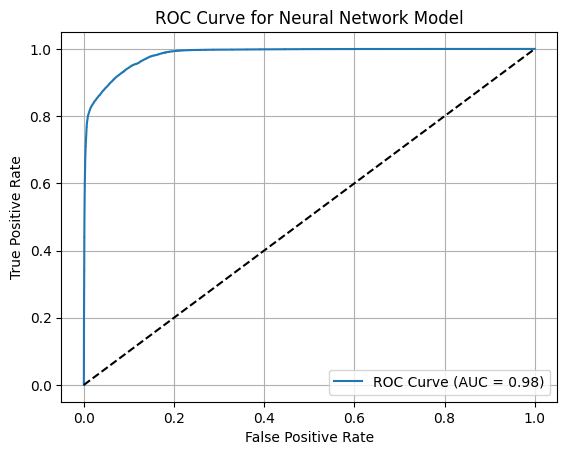

In [103]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step


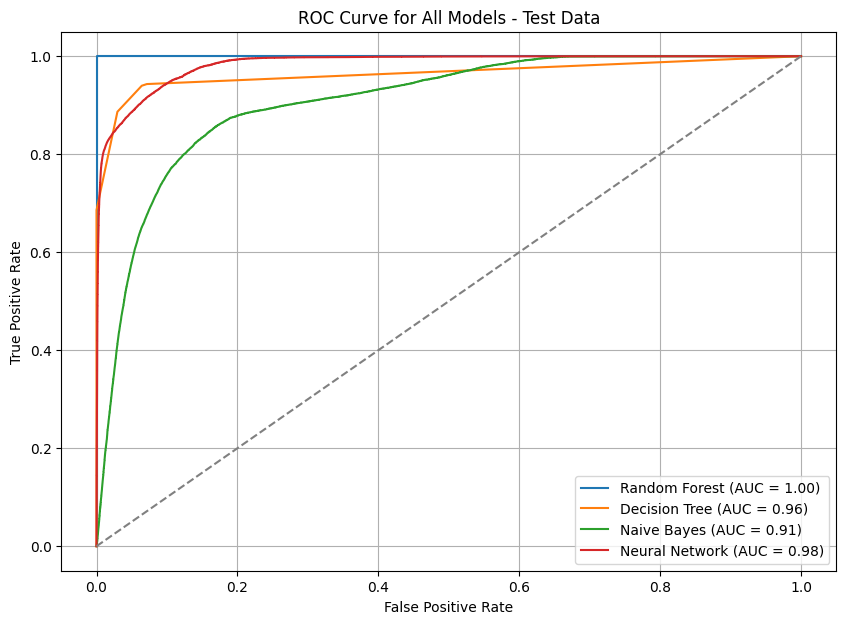

In [104]:
#Predict probabilities (instead of classes)
rf_probs = rf02.predict_proba(X_test)[:, 1]
nb_probs = nb_test.predict_proba(X_test)[:, 1]
dt_probs = cart02.predict_proba(X_test)[:, 1]
nn_probs = model.predict(X_Neu_test).flatten()  # Already sigmoid output

#Get ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_nn, tpr_nn, _ = roc_curve(y_Neu_test, nn_probs)

#Get AUC scores
auc_rf = auc(fpr_rf, tpr_rf)
auc_nb = auc(fpr_nb, tpr_nb)
auc_dt = auc(fpr_dt, tpr_dt)
auc_nn = auc(fpr_nn, tpr_nn)

#Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models - Test Data')
plt.legend()
plt.grid(True)
plt.show()

# Training Data 

In [105]:
y_scores_tr = model.predict(X_Neu).ravel()
y_true_tr = y_Neu.ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_tr, y_scores_tr)
roc_auc2 = auc(fpr, tpr)

30420/30420 ━━━━━━━━━━━━━━━━━━━━ 5s 173us/step


30420/30420 ━━━━━━━━━━━━━━━━━━━━ 5s 174us/step


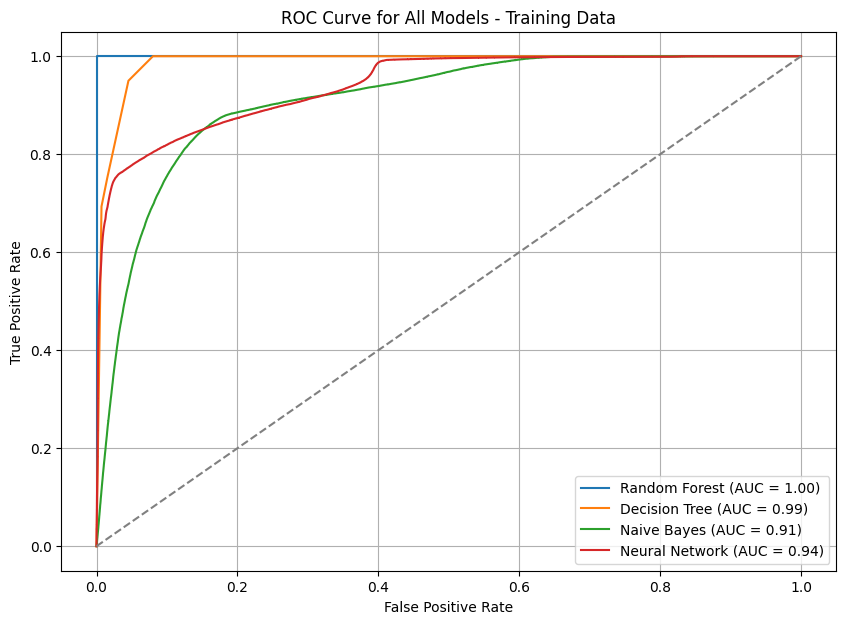

In [106]:
#Predict probabilities (instead of classes)
rf_probs2 = rf01.predict_proba(X)[:, 1]
nb_probs2 = nb.predict_proba(X)[:, 1]
dt_probs2 = cart01.predict_proba(X)[:, 1]
nn_probs2 = model.predict(X_Neu).flatten()  # Already sigmoid output

#Get ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y, rf_probs2)
fpr_nb, tpr_nb, _ = roc_curve(y, nb_probs2)
fpr_dt, tpr_dt, _ = roc_curve(y, dt_probs2)
fpr_nn, tpr_nn, _ = roc_curve(y_Neu, nn_probs2)

#Get AUC scores
auc_rf = auc(fpr_rf, tpr_rf)
auc_nb = auc(fpr_nb, tpr_nb)
auc_dt = auc(fpr_dt, tpr_dt)
auc_nn = auc(fpr_nn, tpr_nn)

#Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models - Training Data')
plt.legend()
plt.grid(True)
plt.show()

# Cross Validation Spilt Figure

In [107]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = cardtrans_train_rebal[['distance_from_home','distance_from_last_transaction',
                           'ratio_to_median_purchase_price','repeat_retailer',
                           'used_chip','used_pin_number', 'online_order']]
y = cardtrans_train_rebal['fraud']

#### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print("Decision Tree CV Scores:", dt_scores)
print("Mean Accuracy:", np.mean(dt_scores))

Decision Tree CV Scores: [0.95304795 0.95364868 0.95382332 0.95345349 0.9535254 ]
Mean Accuracy: 0.9534997682968521


#### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Random Forest CV Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))

Random Forest CV Scores: [0.99999486 1.         1.         0.99999486 1.        ]
Mean Accuracy: 0.9999979454253612


#### Naïve Bayes

In [110]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

print("Naive Bayes CV Scores:", nb_scores)
print("Mean Accuracy:", np.mean(nb_scores))

Naive Bayes CV Scores: [0.85503472 0.85362145 0.85312322 0.8556709  0.85503911]
Mean Accuracy: 0.8544978811787922


#### Neural Network

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
import numpy as np

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train, val in kfold.split(X, y):
    model = create_model()
    model.fit(X.iloc[train], y.iloc[train], epochs=10, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X.iloc[val], y.iloc[val], verbose=0)
    scores.append(accuracy)

# Output scores
print("Neural Network CV Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Neural Network CV Scores: [0.9614819884300232, 0.9433141350746155, 0.9501661658287048, 0.9484094977378845, 0.9610400199890137]
Mean Accuracy: 0.9528823614120483


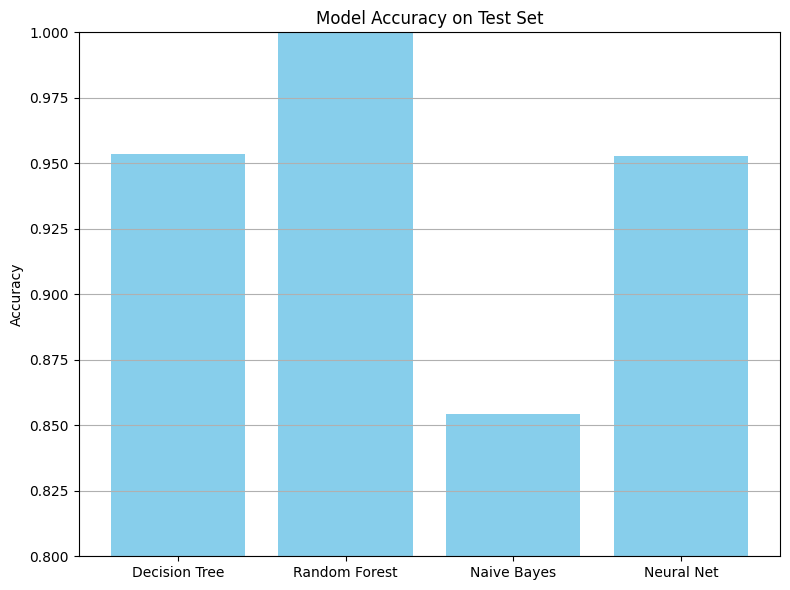

In [112]:
import matplotlib.pyplot as plt

# Replace these with your actual test set accuracies
model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Net']
accuracies = [
    np.mean(dt_scores),
    np.mean(rf_scores),
    np.mean(nb_scores),
    np.mean(scores)
]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy on Test Set')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Use the balanced training set for consistent comparison
X_cv = cardtrans_train_rebal[['distance_from_home','distance_from_last_transaction',
                              'ratio_to_median_purchase_price','repeat_retailer',
                              'used_chip','used_pin_number', 'online_order']]
y_cv = cardtrans_train_rebal['fraud']

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5)
dt_scores = cross_val_score(dt_model, X_cv, y_cv, cv=5, scoring='accuracy')

print("Decision Tree Accuracy Mean:", dt_scores.mean())
print("Decision Tree Accuracy Std Dev:", dt_scores.std())

Decision Tree Accuracy Mean: 0.9534997682968521
Decision Tree Accuracy Std Dev: 0.0002583765786900881


In [115]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion="gini")
rf_scores = cross_val_score(rf_model, X_cv, y_cv, cv=5, scoring='accuracy')

print("Random Forest Accuracy Mean:", rf_scores.mean())
print("Random Forest Accuracy Std Dev:", rf_scores.std())

Random Forest Accuracy Mean: 0.9999989727153189
Random Forest Accuracy Std Dev: 2.0545693622420204e-06


In [116]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer

# Discretize continuous features
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X_cv)

nb_model = MultinomialNB()
nb_scores = cross_val_score(nb_model, X_discrete, y_cv, cv=5, scoring='accuracy')

print("Naive Bayes Accuracy Mean:", nb_scores.mean())
print("Naive Bayes Accuracy Std Dev:", nb_scores.std())

Naive Bayes Accuracy Mean: 0.6618175206911884
Naive Bayes Accuracy Std Dev: 0.0011952095619069852


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the model-building function
def build_nn():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(7,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare features and labels
X_cv = cardtrans_train_rebal[['distance_from_home','distance_from_last_transaction',
                              'ratio_to_median_purchase_price','repeat_retailer',
                              'used_chip','used_pin_number','online_order']]
y_cv = cardtrans_train_rebal['fraud']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cv)

# Create the SciKeras classifier (note: use 'model' not 'build_fn')
nn_model = KerasClassifier(model=build_nn, epochs=10, batch_size=32, verbose=0)

# Run cross-validation
scores = cross_val_score(nn_model, X_scaled, y_cv, cv=5, scoring='accuracy')

# Output results
print("Neural Network Accuracy Mean:", scores.mean())
print("Neural Network Accuracy Std Dev:", scores.std())

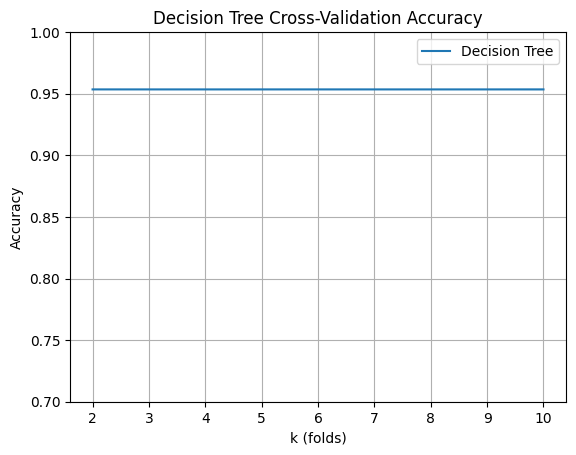

In [118]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

k_range = range(2, 11)
mean_scores = []
std_scores = []

for k in k_range:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    model = DecisionTreeClassifier(max_leaf_nodes=5)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

plt.plot(k_range, mean_scores, label='Decision Tree')
plt.fill_between(k_range, np.array(mean_scores) - np.array(std_scores), np.array(mean_scores) + np.array(std_scores), alpha=0.2)
plt.title("Decision Tree Cross-Validation Accuracy")
plt.xlabel("k (folds)")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()
plt.show()

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion="gini")
rf_scores = cross_val_score(rf_model, X_cv, y_cv, cv=5, scoring='accuracy')

print("Random Forest Accuracy Mean:", rf_scores.mean())
print("Random Forest Accuracy Std Dev:", rf_scores.std())

Random Forest Accuracy Mean: 0.9999989727153189
Random Forest Accuracy Std Dev: 2.0545693622420204e-06


In [125]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer

# Discretize continuous features
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discrete = discretizer.fit_transform(X_cv)

nb_model = MultinomialNB()
nb_scores = cross_val_score(nb_model, X_discrete, y_cv, cv=5, scoring='accuracy')

print("Naive Bayes Accuracy Mean:", nb_scores.mean())
print("Naive Bayes Accuracy Std Dev:", nb_scores.std())

Naive Bayes Accuracy Mean: 0.6615709713915466
Naive Bayes Accuracy Std Dev: 0.0012238307905854098


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_nn():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(7,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(model=build_nn, epochs=10, batch_size=32, verbose=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cv)

nn_scores = cross_val_score(nn_model, X_scaled, y_cv, cv=5, scoring='accuracy')

print("Neural Network Accuracy Mean:", nn_scores.mean())
print("Neural Network Accuracy Std Dev:", nn_scores.std())
